<a href="https://colab.research.google.com/github/BerkayArdaa/ML_HandwrittenDigits_Classification_CNN/blob/main/ML_Homework3_CNN_OR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# === MNIST CNN Homework - EEE 517 ===
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [3]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train images shape :", X_train.shape)
print("Train labels shape :", y_train.shape)
print("Test images shape  :", X_test.shape)
print("Test labels shape  :", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape  : (10000, 28, 28)
Test labels shape  : (10000,)


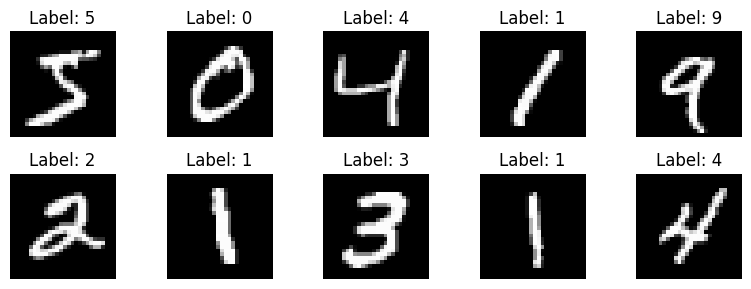

In [4]:
# Showing some sample images from the dataset

plt.figure(figsize=(8, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
# Normalize pixel values to [0,1] and reshape for CNN

# Convert from (N, 28, 28) to (N, 28, 28, 1) and scale to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("New train shape:", X_train.shape)
print("New test shape :", X_test.shape)


New train shape: (60000, 28, 28, 1)
New test shape : (10000, 28, 28, 1)


In [8]:
# Create a small validation set from training data

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print("Train subset shape:", X_train_sub.shape, y_train_sub.shape)
print("Validation shape  :", X_val.shape, y_val.shape)
print("Test shape        :", X_test.shape, y_test.shape)


Train subset shape: (54000, 28, 28, 1) (54000,)
Validation shape  : (6000, 28, 28, 1) (6000,)
Test shape        : (10000, 28, 28, 1) (10000,)


In [10]:
# === CNN Model Definition ===

tf.keras.backend.clear_session()

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_opt = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),          # optimum dropout
    Dense(10, activation='softmax')
])
model_opt.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam

# Optimizer with optimal learning rate (default 0.001)
opt = Adam(learning_rate=0.001)

model_opt.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Final training
history_opt = model_opt.fit(
    X_train_sub, y_train_sub,
    epochs=10,
    batch_size=32,         # optimum batch size
    validation_data=(X_val, y_val),
    verbose=1
)

# Final accuracy
print("Final Validation Accuracy:", max(history_opt.history['val_accuracy']))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9968 - loss: 0.0090 - val_accuracy: 0.9920 - val_loss: 0.0313
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.9935 - val_loss: 0.0324
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9968 - loss: 0.0090 - val_accuracy: 0.9912 - val_loss: 0.0449
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0108 - val_accuracy: 0.9908 - val_loss: 0.0427
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9974 - loss: 0.0070 - val_accuracy: 0.9918 - val_loss: 0.0356
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9913 - val_loss: 0.0422
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9925 - val_loss: 0.0399
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0059 - 

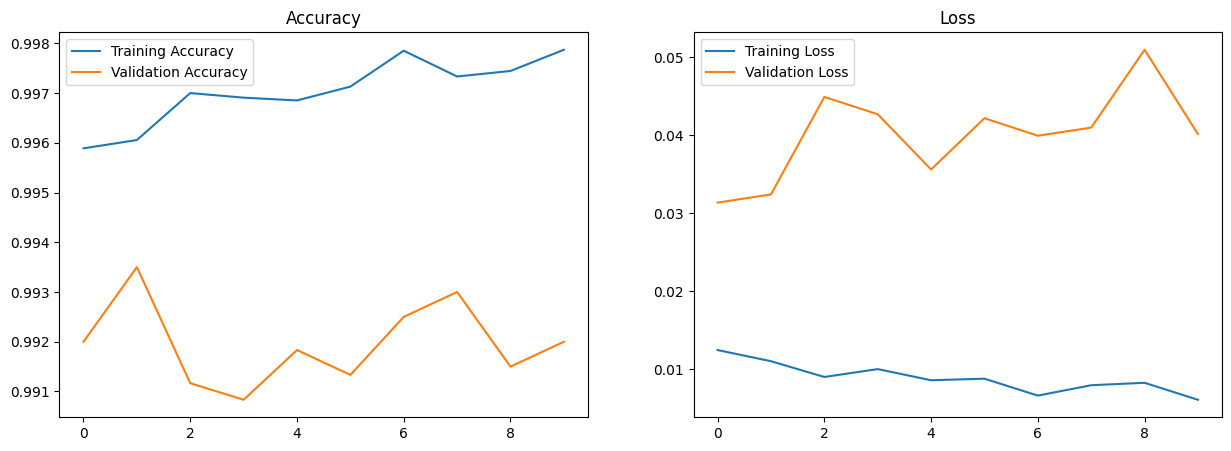

In [27]:
plt.figure(figsize=(15,5))

# ACCURACY
plt.subplot(1,2,1)
plt.plot(history_opt.history['accuracy'], label="Training Accuracy")
plt.plot(history_opt.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# LOSS
plt.subplot(1,2,2)
plt.plot(history_opt.history['loss'], label="Training Loss")
plt.plot(history_opt.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


In [28]:
import os
print(os.listdir("VDataset"))


['deneme6.jpg']


In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("VDataset/deneme7.jpg")

if img is None:
    print("FAILED to load image!")
else:
    print("Image loaded successfully!")




Image loaded successfully!


Image successfully loaded!


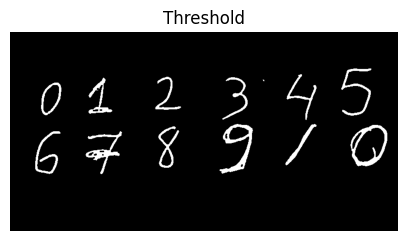


Detected digits: 12
Predicted digits in order:

6 0 7 1 2 8 9 3 1 4 5 0 



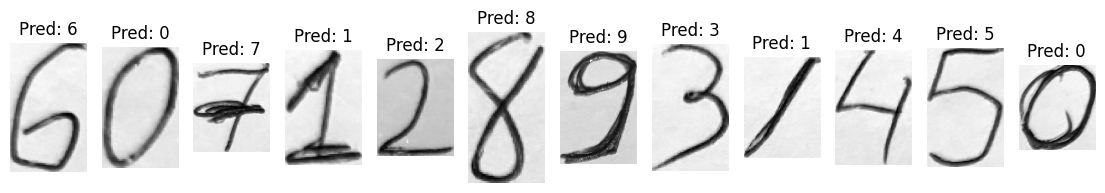

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ======================================
# MNIST UYUMLU PREPROCESS FONKSİYONU
# ======================================
def prepare_digit(digit_raw):

    # 1) Invert (MNIST: beyaz digit, siyah arka plan)
    digit = cv2.bitwise_not(digit_raw)

    # 2) Threshold
    _, digit = cv2.threshold(digit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3) İç contour’u bul
    cnts, _ = cv2.findContours(digit.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(cnts) == 0:
        return None

    c = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    digit = digit[y:y+h, x:x+w]

    # 4) MNIST standardı: max boyutu 20px olacak şekilde scale et
    h, w = digit.shape
    if w > h:
        factor = 20.0 / w
    else:
        factor = 20.0 / h

    digit = cv2.resize(digit, None, fx=factor, fy=factor)

    # 5) Pad to 28×28 (ortala)
    h, w = digit.shape
    pad_top    = (28 - h) // 2
    pad_bottom = 28 - h - pad_top
    pad_left   = (28 - w) // 2
    pad_right  = 28 - w - pad_left

    digit = np.pad(
        digit,
        ((pad_top, pad_bottom), (pad_left, pad_right)),
        "constant",
        constant_values=0
    )

    # 6) Normalize
    digit = digit.astype("float32") / 255.0

    # 7) CNN reshape
    digit = digit.reshape(1, 28, 28, 1)

    return digit


# ======================================
# FOTOĞRAFI OKU
# ======================================
img = cv2.imread("VDataset/deneme9.jpg")

if img is None:
    print("Image NOT loaded!")
else:
    print("Image successfully loaded!")

# 1) Resize → contour stabil olsun
scale = 800 / img.shape[1]
img = cv2.resize(img, None, fx=scale, fy=scale)

# 2) Grayscale + Blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

# 3) Adaptive Threshold
thresh = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    25, 10
)

# Morphology (ufak boşlukları kapat)
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

# Show threshold
plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap='gray')
plt.title("Threshold")
plt.axis("off")
plt.show()

# 4) Contours
contours, _ = cv2.findContours(
    thresh.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

digits = []

# ======================================
# RAKAMLARI İŞLE
# ======================================
for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # çok küçük gürültüleri at
    if w < 20 or h < 20:
        continue

    digit_raw = gray[y:y+h, x:x+w]

    # MNIST preprocessing
    digit_ready = prepare_digit(digit_raw)
    if digit_ready is None:
        continue

    # Tahmin (model_opt kullandık!)
    pred = np.argmax(model_opt.predict(digit_ready, verbose=0))

    digits.append((x, pred, digit_raw))

# ======================================
# SOLDAN SAĞA SIRALA
# ======================================
digits.sort(key=lambda d: d[0])

print("\nDetected digits:", len(digits))
print("Predicted digits in order:\n")

for _, p, _ in digits:
    print(p, end=" ")

print("\n")

# ======================================
# RAKAMLARI GÖSTER
# ======================================
plt.figure(figsize=(14, 3))
for i, (_, pred, roi) in enumerate(digits):
    plt.subplot(1, len(digits), i+1)
    plt.imshow(roi, cmap='gray')
    plt.title(f"Pred: {pred}")
    plt.axis("off")

plt.show()
